<a href="https://colab.research.google.com/github/jesvin1/Basics/blob/master/From_Analytics_vidya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/

In [1]:
!pip install yfinance

  Created wheel for yfinance: filename=yfinance-0.1.54-py2.py3-none-any.whl size=22409 sha256=fc0bbbfe00137c99567153f0ddfd39826d829edf32233170d5d8e019ac1fceda
  Stored in directory: /root/.cache/pip/wheels/f9/e3/5b/ec24dd2984b12d61e0abf26289746c2436a0e7844f26f2515c
Successfully built yfinance


In [0]:
import yfinance as yf
import datetime as datetime
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [0]:
# sets the sample period as 5 years back from 09/12/2019
end = datetime.datetime(2019, 9, 12)
start = end - datetime.timedelta(days = 15*365)

In [8]:
# gets the closing price fo HDFC for the past 7 years
my_stock = yf.Ticker('^NSEI')
my_stock = pd.DataFrame(my_stock.history(start = start, end = end)['Close'])
my_stock = my_stock.rename(str.lower, axis = 'columns')
my_stock.head()

,close
Date,
2007-09-17,4494.65
2007-09-18,4546.20
2007-09-19,4732.35
2007-09-20,4747.55
2007-09-21,4837.55


In [9]:

# Now, we will load the data set and look at some initial rows and data types of the columns:
#data = pd.read_csv('AirPassengers.csv')
print (my_stock.head())
print ('\n Data Types:')
print (my_stock.dtypes)

# The data contains a particular month and number of passengers travelling in that month. In order to read the data as a time series, we have to pass special arguments to the read_csv command:
#dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
#data = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)
#print ('\n Parsed Data:')
#print (data.head())

## NOTE: You can run remaining codes in this article as well, using this live coding window.

              close
Date               
2007-09-17  4494.65
2007-09-18  4546.20
2007-09-19  4732.35
2007-09-20  4747.55
2007-09-21  4837.55

 Data Types:
close    float64
dtype: object


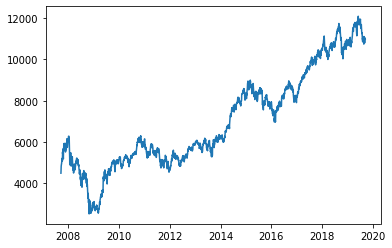

In [16]:
plt.plot(my_stock);

In [0]:
from statsmodels.tsa.stattools import adfuller
#Test for staionarity
def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block=False)
    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,autolag='AIC')
    # output for dft will give us without defining what the values are.
    #hence we manually write what values does it explains using a for loop
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of observations used'])
    for key,values in adft[4].items():
        output['critical value (%s)'%key] =  values
    print(output)

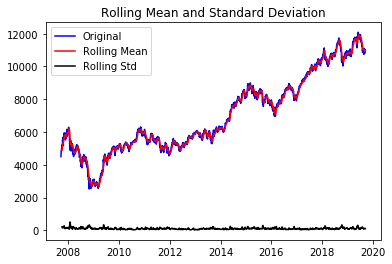

Results of dickey fuller test
Test Statistics                  -0.287236
p-value                           0.927293
No. of lags used                  7.000000
Number of observations used    2918.000000
critical value (1%)              -3.432593
critical value (5%)              -2.862531
critical value (10%)             -2.567298
dtype: float64


In [33]:
test_stationarity(my_stock['close'])

#How to make a Time Series Stationary?

##using the log


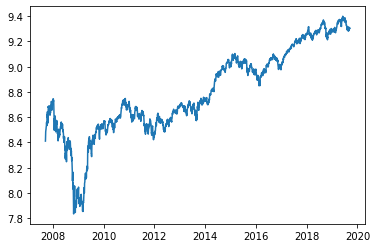

In [34]:
ts_log = np.log(my_stock)
plt.plot(ts_log)

##Taking the rolling mean

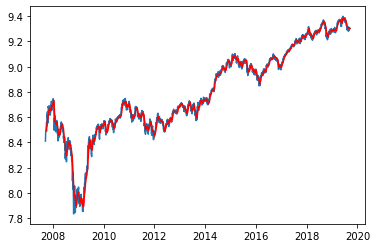

In [39]:
moving_avg = ts_log.rolling(12).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [40]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

,close
Date,
2007-09-17,NaN
2007-09-18,NaN
2007-09-19,NaN
2007-09-20,NaN
2007-09-21,NaN
2007-09-24,NaN
2007-09-25,NaN
2007-09-26,NaN
2007-09-27,NaN


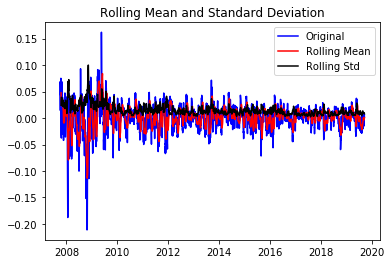

Results of dickey fuller test
Test Statistics               -1.123080e+01
p-value                        1.909695e-20
No. of lags used               1.200000e+01
Number of observations used    2.902000e+03
critical value (1%)           -3.432605e+00
critical value (5%)           -2.862536e+00
critical value (10%)          -2.567300e+00
dtype: float64


In [42]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff['close'])